In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [39]:
os.chdir('C:\\Users\\Akash Deepak\\Desktop\\Project')
data = pd.read_csv("TS Data.csv",index_col=[0],parse_dates=[0])
data.head()

,Usage
Date,
2015-04-01,3734.0
2015-04-02,3709.0
2015-04-03,3188.0
2015-04-04,3721.0
2015-04-05,3685.0


In [42]:
data=data.resample('1M').sum()
data.head()

,Usage
Date,
2015-04-30,11835937.00
2015-05-31,16240033.00
2015-06-30,15364887.92
2015-07-31,19362677.00
2015-08-31,19753990.00


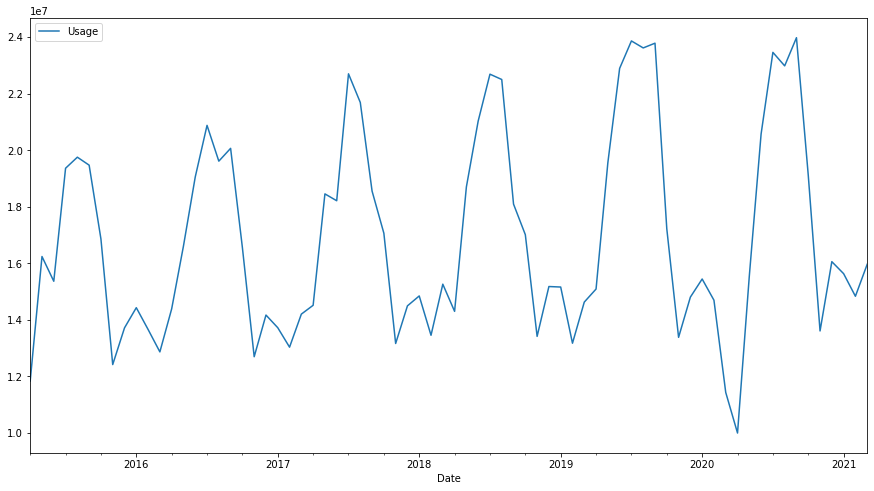

In [43]:
data.plot()

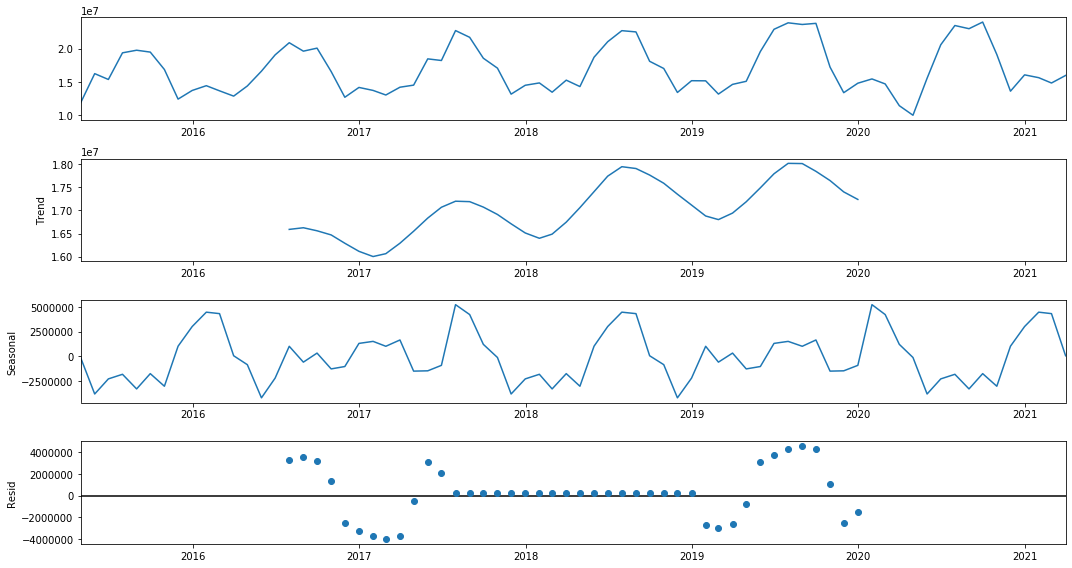

In [48]:
result_a= seasonal_decompose(data, model='additive',period=30)
result_a.plot()
plt.show()

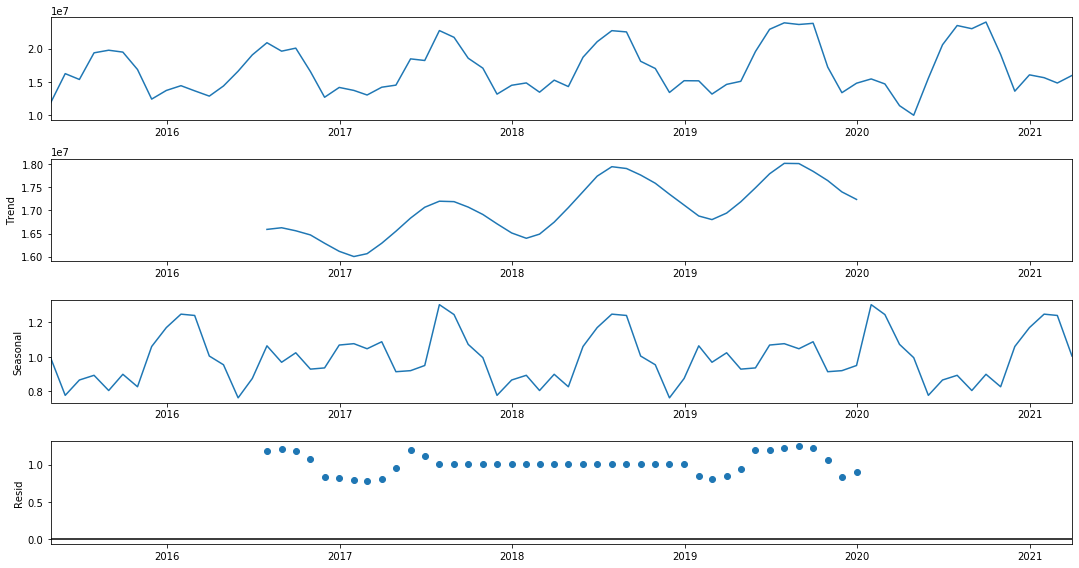

In [49]:
result_m= seasonal_decompose(data, model='multiplicative',period=30)
result_m.plot()
plt.show()

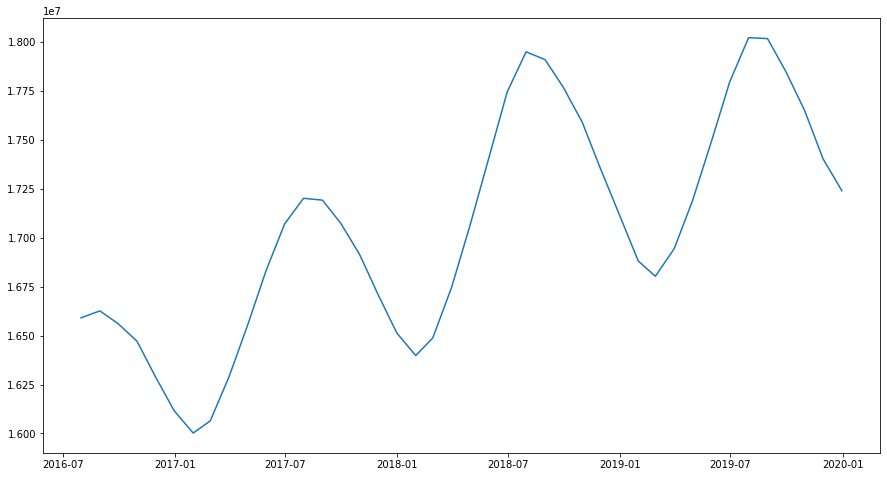

In [51]:
plt.plot(result_a.trend)

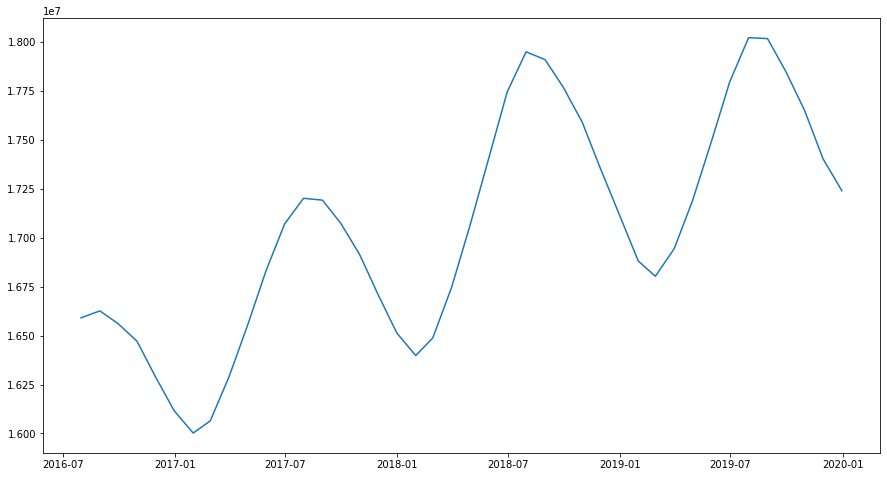

In [52]:
plt.plot(result_m.trend)

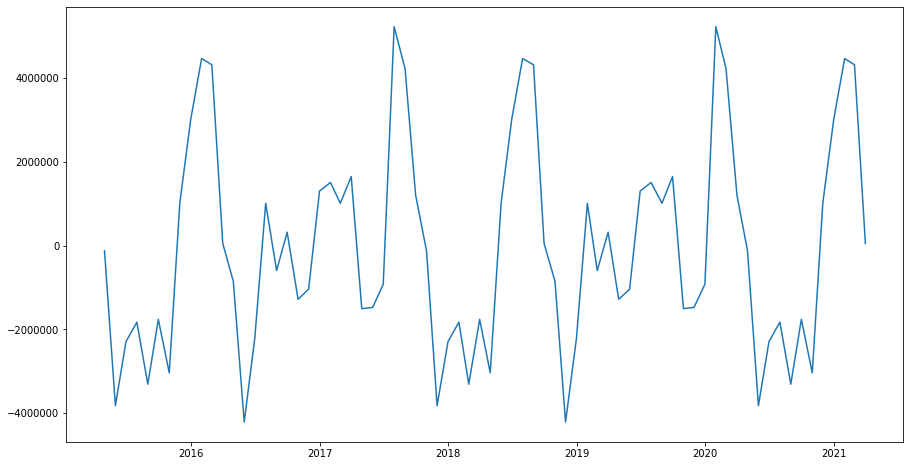

In [66]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(result_a.seasonal)

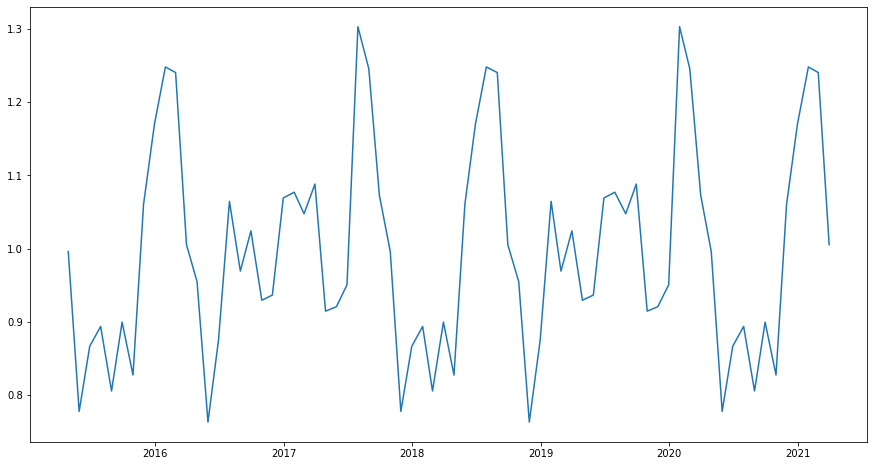

In [67]:
plt.plot(result_m.seasonal)

## ADF test

In [58]:
result=adfuller(data["Usage"])
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))
    
if result[0]<result[4] ["5%"]:
    print("Reject H0-Time Series is Stationary")
else:
    print("Failed to Reject H0-Time Series is Non-Stationary")

ADF Statistic: -1.977186
p-value: 0.296665
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Failed to Reject H0-Time Series is Non-Stationary


## Holt Winter Model

In [60]:
data.index.freq = 'M'
m = 12
alpha = 1/(2*m)

## Single HWES

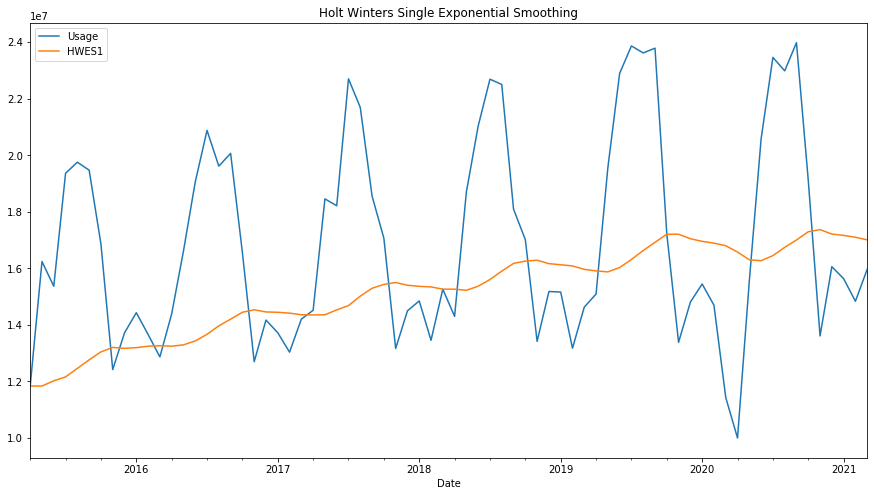

In [68]:
data['HWES1'] = SimpleExpSmoothing(data['Usage']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
data[['Usage','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

## Double HWES

C:\Users\Akash Deepak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


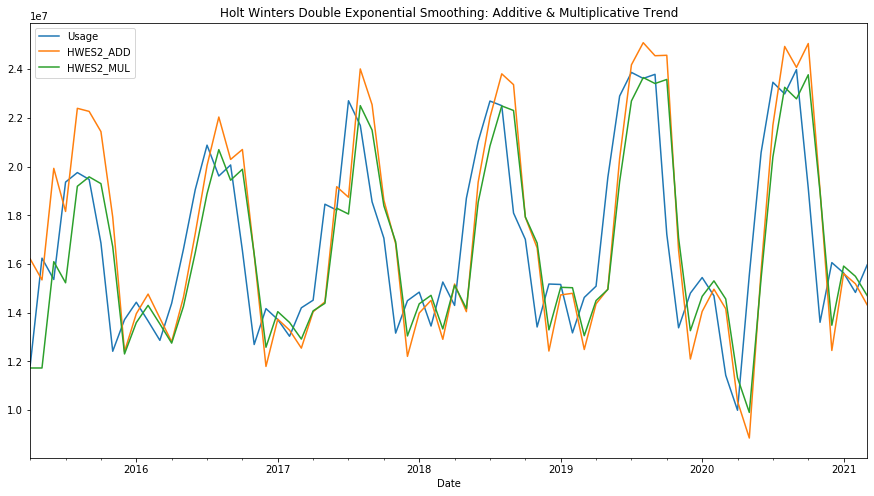

In [72]:
data['HWES2_ADD'] = ExponentialSmoothing(data['Usage'],trend='add').fit().fittedvalues
data['HWES2_MUL'] = ExponentialSmoothing(data['Usage'],trend='mul').fit().fittedvalues
data[['Usage','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive & Multiplicative Trend')

## Triple HWES

C:\Users\Akash Deepak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Akash Deepak\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


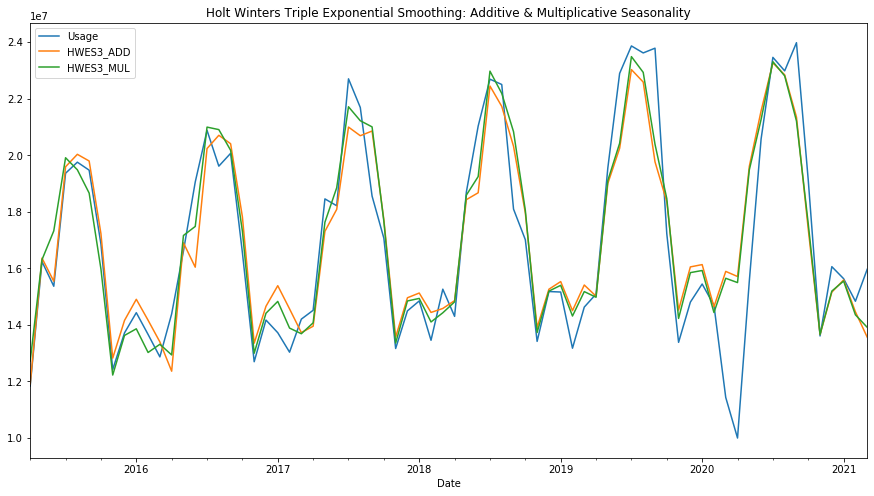

In [71]:
data['HWES3_ADD'] = ExponentialSmoothing(data['Usage'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data['HWES3_MUL'] = ExponentialSmoothing(data['Usage'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data[['Usage','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive & Multiplicative Seasonality')

In [79]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp37-cp37m-win_amd64.whl (591 kB)


In [80]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [84]:
stepwise_fit = auto_arima(data['Usage'], start_p = 0, start_q = 0,
                          max_p = 5, max_q = 5, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True, 
                          stepwise = True)  
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1896.091, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1894.140, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1889.456, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1889.837, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1897.019, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1887.835, Time=0.09 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1889.446, Time=0.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1891.397, Time=0.94 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1889.856, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1889.981, Time=0.14 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1887.877, Time=0.05 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=1891.783, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=1887.583, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=1889.576, Time=0.47 sec
 ARIMA(1,0,0)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -941.791
Date:                            Sat, 05 Jun 2021   AIC                           1887.583
Time:                                    14:11:45   BIC                           1891.771
Sample:                                         0   HQIC                          1889.221
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2965      0.088      3.386      0.001       0.125       0.468
sigma2      2.507e+12   8.05e-15   3.12e+26      0.000    2.51e+12    2.51e+12
===================================================================================
Ljung-Box (Q):                       52.24   Jarque-Bera (JB):                14.95
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               2.66   Skew:                             0.35
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.43e+41. Standard errors may be unstable.
"""